## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Checking Indiviudal CSV's
# mouse_metadata

In [3]:
# Checking Indiviudal CSV's
# study_results

In [319]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Count Length Of Data Set 
# mouse_study_df.count()
mouse_study_df['Mouse ID'].count()

1893

In [6]:
# Checking unique number of mice 
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [7]:
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
duplicate_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
main_mouse_study_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
# main_mouse_study_df.head()

In [10]:
len(main_mouse_study_df['Mouse ID'].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
generate_summary = main_mouse_study_df[['Drug Regimen','Tumor Volume (mm3)']]

In [12]:
len(generate_summary['Drug Regimen'].unique())

10

In [13]:
groupby_regimen = generate_summary.groupby(['Drug Regimen'])
# groupby_regimen.head()

In [14]:
mean_summary = groupby_regimen['Tumor Volume (mm3)'].mean()
median_summary = groupby_regimen['Tumor Volume (mm3)'].median()
variance_summary = groupby_regimen['Tumor Volume (mm3)'].var()
std_summary = groupby_regimen['Tumor Volume (mm3)'].std()
sem_summary = groupby_regimen['Tumor Volume (mm3)'].sem()

In [15]:
summary_statistics_table = pd.DataFrame({"Mean":mean_summary,
                                          "Median":median_summary,
                                          "Variance":variance_summary,
                                          "Standard Deviation":std_summary,
                                          "SEM":sem_summary})
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#tumor_volume = groupby_regimen['Tumor Volume (mm3)']
#tumor_volume.head()

In [17]:
#mean_summary = np.mean(tumor_volume)
#median_summary = np.median(tumor_volume)
#variance_summary = np.var(tumor_volume,ddof = 0)
#std_summary = np.std(tumor_volume,ddof = 0)

In [18]:
#sample_num = 100
#samples = [tumor_volume.sample(sample_num) for x in range(0,1)]

In [19]:
#sems = [sem(s) for s in samples]
#sems

In [20]:
#generate_summary["Mean"] = mean_summary
#generate_summary.head(50)

In [21]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#creating_statistics_table = pd.DataFrame({
                                          #"Mean":mean_summary,
                                          #"Median":median_summary,
                                          #"Variance":variance_summary,
                                          #"Standard Deviation:":std_summary, 
                                          #"SEM":sems})
#creating_statistics_table.head()
# Assemble the resulting series into a single summary dataframe.



In [22]:
groupby_regimen_df = generate_summary.groupby(['Drug Regimen'])
# groupby_regimen_df.head()

groupby_regimen_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
10,Capomulin,45.000000
11,Capomulin,43.878496
12,Capomulin,37.614948
13,Capomulin,38.177232
14,Capomulin,36.866876


In [23]:
groupby_regimen_df['Drug Regimen'].value_counts()

Drug Regimen  Drug Regimen
Capomulin     Capomulin       230
Ceftamin      Ceftamin        178
Infubinol     Infubinol       178
Ketapril      Ketapril        188
Naftisol      Naftisol        186
Placebo       Placebo         181
Propriva      Propriva        148
Ramicane      Ramicane        228
Stelasyn      Stelasyn        181
Zoniferol     Zoniferol       182
Name: Drug Regimen, dtype: int64

In [24]:
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = groupby_regimen_df.agg([np.mean,np.median,np.std,np.var,sem])
aggregation_method 

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [26]:
#sem_output = sem(.)
#sem_output 

## Bar and Pie Charts

In [ ]:
#total amount of tumor volume 

In [27]:
groupby_regimen_df['Tumor Volume (mm3)'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [28]:
drug_count_df = groupby_regimen_df['Tumor Volume (mm3)'].count()

In [29]:
#https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/#:~:text=To%20convert%20Pandas%20DataFrame%20to,returned%20ndarray%20is%202%2Ddimensional.
drug_list = drug_count_df.to_numpy()
drug_list

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

In [30]:
drug_names = ["Capomulin","Ceftamin","Infubinol","Ketapril","Nattisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

In [210]:
#x_axis = np.arange(len(drug_list))
#x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 990]
#x_axis = np.arange(len(x))

In [250]:
#x_positions = [1]
#ticks = 1
#for i in range(len(drug_names)-1):
    #ticks = ticks + 10
    #x_positions.append(ticks)

In [291]:
#x_axis = np.arange(x_positions)

In [266]:
#x_axis = [1, 5, 8, 8, 10, 12, 14, 16, 18, 20]

In [271]:
x_axis = np.arange(len(drug_list))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [272]:
#each_drug_df = main_mouse_study_df[['Drug Regimen']]
#num_of_ramicane = len(each_drug_df.loc[(each_drug_df['Drug Regimen'] == "Ramicane")])
#num_of_capomulin = len(each_drug_df.loc[(each_drug_df['Drug Regimen'] == "Capomulin")])
#num_of_ceftamin = len(each_drug_df.loc[(each_drug_df['Drug Regimen'] == "Ceftamin")])

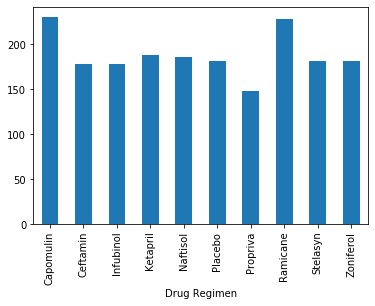

In [285]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count_df.plot.bar()

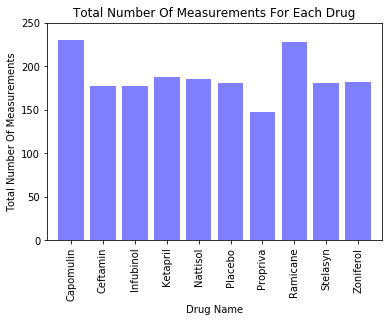

In [290]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis, drug_list, width = 0.8, color = "b", alpha =0.5, align = "center")
tick_locations = [value for value in x_axis]

#https://matplotlib.org/stable/gallery/ticks_and_spines/ticklabels_rotation.html
plt.xticks(tick_locations, drug_names, rotation='vertical')


plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)

plt.title("Total Number Of Measurements For Each Drug")
plt.xlabel("Drug Name")
plt.ylabel("Total Number Of Measurements")

plt.show()

In [293]:
mouse_sex_df = main_mouse_study_df[['Sex']]
mouse_sex_df 

,Sex
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
1888,Male
1889,Male
1890,Male
1891,Male


In [298]:
mouse_sex_counts = mouse_sex_df['Sex'].value_counts()

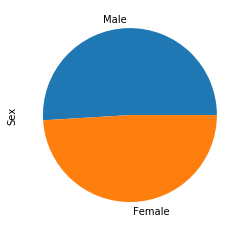

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_counts.plot.pie()

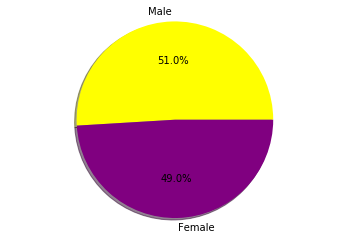

In [316]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male","Female"]

#https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/#:~:text=To%20convert%20Pandas%20DataFrame%20to,returned%20ndarray%20is%202%2Ddimensional.
# Total Counts For Each Sex In An Array
sex_list = mouse_sex_counts.to_numpy()

colors = ["yellow","purple"]

plt.pie(sex_list, labels=sex, autopct="%1.1f%%", colors=colors,shadow=True, startangle=0)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [329]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

finding_final_tumor_vol = main_mouse_study_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
finding_final_tumor_vol


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [383]:
only_capomulin = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Capomulin')]
max_timepoint_capomulin = only_capomulin.groupby(['Mouse ID'], sort=False)['Timepoint'].max()
max_timepoint_capomulin

Mouse ID
s185    45
x401    45
m601    45
f966    20
u364    45
y793    45
r554    45
m957    45
t565    45
i738    45
w914    45
g288    45
l897    45
b742    45
b128    45
j246    35
j119    45
w150    10
v923    45
g316    45
s710    45
l509    45
r944    45
i557    45
r157    15
Name: Timepoint, dtype: int64

In [392]:
final_capomulin = pd.merge(only_capomulin,max_timepoint_capomulin,on="Timepoint")
print(final_capomulin)

    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       s185    Capomulin         10           37.614948
1       x401    Capomulin         10           39.113891
2       m601    Capomulin         10           36.825367
3       f966    Capomulin         10           35.624403
4       u364    Capomulin         10           46.568417
..       ...          ...        ...                 ...
530     i557    Capomulin         45           47.685963
531     i557    Capomulin         45           47.685963
532     i557    Capomulin         45           47.685963
533     i557    Capomulin         45           47.685963
534     i557    Capomulin         45           47.685963

[535 rows x 4 columns]


In [376]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


# final_capomulin

only_ramicane = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Ramicane')]
final_ramicane = only_ramicane.loc[(only_ramicane['Timepoint']== 45)]
# final_ramicane

only_infubinol = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Infubinol')]
final_infubinol = only_infubinol.loc[(only_infubinol['Timepoint']== 45)]
# final_infubinol

only_ceftamin = finding_final_tumor_vol.loc[(finding_final_tumor_vol['Drug Regimen']== 'Ceftamin')]
final_ceftamin = only_ceftamin.loc[(only_ceftamin['Timepoint']== 5)]
# final_ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [377]:
main_mouse_study_df['Timepoint'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [378]:
len(final_ceftamin)

21

In [369]:
len(only_ceftamin['Mouse ID'].unique())

25

In [370]:
len(final_ceftamin['Mouse ID'].unique())

21

In [38]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
